In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## Preprocessing train dataset

In [3]:
df.replace(to_replace = 'Has relevent experience',value = 'Yes',inplace = True)
df.replace(to_replace = 'No relevent experience',value='No',inplace = True )

df.replace(to_replace = '<1',value = '0',inplace = True)
df.replace(to_replace = '>20',value = '21',inplace=True)
df.replace(to_replace = 'never',value = '0',inplace=True)
df.replace(to_replace = '>4',value = '5',inplace=True)


df.replace(to_replace = 'Full time course',value = 'Full_time_course',inplace=True)
df.replace(to_replace = 'Part time course',value = 'Part_time_course',inplace=True)

df.replace(to_replace = 'Primary School',value = 'Primary_School',inplace=True)
df.replace(to_replace = 'High School',value = 'High_School',inplace=True)

df.replace(to_replace = 'Business Degree',value = 'Business_Degree',inplace=True)
df.replace(to_replace = 'No Major',value = 'No_Major',inplace=True)

df.replace(to_replace = 'Pvt Ltd',value = 'Pvt_Ltd',inplace=True)
df.replace(to_replace = 'Funded Startup',value = 'Funded_Startup',inplace=True)
df.replace(to_replace = 'Public Sector',value = 'Public_Sector',inplace=True)
df.replace(to_replace = 'Early Stage Startup',value = 'Early_Stage_Startup',inplace=True)

df['major_discipline'].replace('Other','Other_major',inplace=True)
df['company_type'].replace('Other','Other_type',inplace=True)

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Yes,no_enrollment,Graduate,STEM,21,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No,no_enrollment,Graduate,STEM,15,50-99,Pvt_Ltd,5,47,0.0
2,11561,city_21,0.624,NaN,No,Full_time_course,Graduate,STEM,5,NaN,NaN,0,83,0.0
3,33241,city_115,0.789,NaN,No,NaN,Graduate,Business_Degree,0,NaN,Pvt_Ltd,0,52,1.0
4,666,city_162,0.767,Male,Yes,no_enrollment,Masters,STEM,21,50-99,Funded_Startup,4,8,0.0


In [5]:
df.drop(['enrollee_id','city'],axis=1,inplace=True)

In [6]:
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Yes,no_enrollment,Graduate,STEM,21,NaN,NaN,1,36,1.0
1,0.776,Male,No,no_enrollment,Graduate,STEM,15,50-99,Pvt_Ltd,5,47,0.0
2,0.624,NaN,No,Full_time_course,Graduate,STEM,5,NaN,NaN,0,83,0.0
3,0.789,NaN,No,NaN,Graduate,Business_Degree,0,NaN,Pvt_Ltd,0,52,1.0
4,0.767,Male,Yes,no_enrollment,Masters,STEM,21,50-99,Funded_Startup,4,8,0.0


### deal with null values

In [7]:
# null value
percent_null = df.isnull().sum()/df.shape[0]*100
print(percent_null)

city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64


Columns in which we have 2% or less than 2% null values we can drop those null values

In [8]:
df.dropna(subset=['enrolled_university','education_level','experience','last_new_job'], axis=0, inplace=True)

In [9]:
df.shape

(18014, 12)

Now we are going to fill null values with their mode as all the columns left have data type as 'object'

In [10]:
col_mode = ['gender','company_size','major_discipline','company_type','relevent_experience']
for col in col_mode:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [11]:
df.isnull().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [12]:
#Let's change the dtype of experience and last_new_job column
df = df.astype({'experience':int,'last_new_job':int})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  18014 non-null  float64
 1   gender                  18014 non-null  object 
 2   relevent_experience     18014 non-null  object 
 3   enrolled_university     18014 non-null  object 
 4   education_level         18014 non-null  object 
 5   major_discipline        18014 non-null  object 
 6   experience              18014 non-null  int32  
 7   company_size            18014 non-null  object 
 8   company_type            18014 non-null  object 
 9   last_new_job            18014 non-null  int32  
 10  training_hours          18014 non-null  int64  
 11  target                  18014 non-null  float64
dtypes: float64(2), int32(2), int64(1), object(7)
memory usage: 1.6+ MB


## handling categorical values

In [14]:
# get dummies

education_df = pd.get_dummies(df[['education_level']],drop_first=True,prefix=[None])
company_size_df = pd.get_dummies(df[['company_size']],drop_first=True,prefix=[None])
company_type_df = pd.get_dummies(df[['company_type']],drop_first=True,prefix=[None])
major_df = pd.get_dummies(df[['major_discipline']],drop_first=True,prefix=[None])
university_df = pd.get_dummies(df[['enrolled_university']],drop_first=True,prefix=[None])
experience_df = pd.get_dummies(df[['relevent_experience']],drop_first=True,prefix=[None])
gender_df = pd.get_dummies(df[['gender']],drop_first=True,prefix=[None])

In [15]:
# drop original columns
df.drop(['education_level','company_size','company_type','major_discipline','enrolled_university','relevent_experience','gender'],axis=1,inplace=True)

In [16]:
final_df = pd.concat([df,education_df,company_size_df,company_type_df,major_df,university_df,experience_df,gender_df],axis=1) 

In [17]:
final_df.head()

,city_development_index,experience,last_new_job,training_hours,target,High_School,Masters,Phd,Primary_School,100-500,...,Business_Degree,Humanities,No_Major,Other_major,STEM,Part_time_course,no_enrollment,Yes,Male,Other
0,0.920,21,1,36,1.0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,1,0
1,0.776,15,5,47,0.0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,0.624,5,0,83,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.767,21,4,8,0.0,0,1,0,0,0,...,0,0,0,0,1,0,1,1,1,0
5,0.764,11,1,24,1.0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,1,0


In [18]:
final_df.to_csv('final_df.csv')

## Model Building

In [19]:
X = final_df.drop(['target'], axis = 1)
y = final_df['target']

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, log_loss, plot_roc_curve, auc, precision_recall_curve
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

### Train-Test split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state = 42)

In [22]:
X_train.shape

(14411, 30)

In [23]:
X_test.shape

(3603, 30)

In [24]:
y_train.shape

(14411,)

In [25]:
y_test.shape

(3603,)

<AxesSubplot:xlabel='target', ylabel='count'>

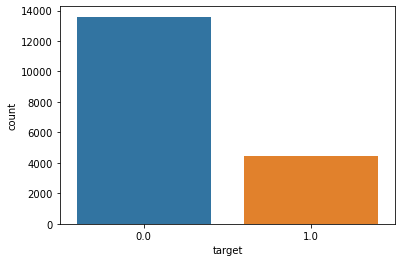

In [26]:
import seaborn as sns
sns.countplot(df['target'])

### Applying Smote

<AxesSubplot:xlabel='target', ylabel='count'>

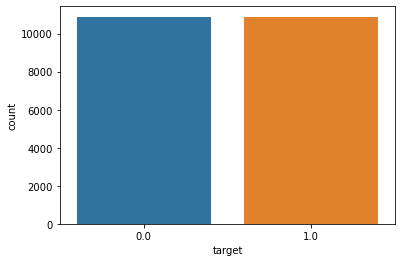

In [27]:
smote = SMOTE(random_state = 402)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)


sns.countplot(y_train_smote)

In [28]:
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train_smote)
X_test_std=sc.transform(X_test)

In [29]:
X_train_std.shape

(21778, 30)

In [30]:
X_test_std.shape

(3603, 30)

In [31]:
y_train_smote.shape

(21778,)

In [32]:
y_test.shape

(3603,)

## XGBoost : Hyper-parameter Tuning & Random CV

In [33]:
clf = XGBClassifier()

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

random_cv=RandomizedSearchCV(estimator=clf,param_distributions=params,
                             cv=5,n_iter=5,scoring='roc_auc',n_jobs=1,verbose=3,return_train_score=True,random_state=121)
random_cv.fit(X_train_std,y_train_smote)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[10:47:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=0.6;, score=(train=0.939, test=0.750) total time=   1.2s
[10:47:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=0.6;, score=(train=0.919, test=0.835) total time=   1.0s
[10:47:37] WARNING: C:/Users/Adm

[CV 4/5] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0;, score=(train=0.901, test=0.965) total time=   1.0s
[10:48:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0;, score=(train=0.900, test=0.962) total time=   1.1s
[10:48:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [34]:
#best parameter 
random_cv.best_params_

{'subsample': 0.6,
 'min_child_weight': 1,
 'max_depth': 5,
 'gamma': 1.5,
 'colsample_bytree': 0.8}

### Training model

In [35]:
clf = XGBClassifier(colsample_bytree= 0.8,
 gamma= 1.5,
 max_depth= 5,
 min_child_weigh= 1,
 subsample= 0.6)

clf.fit(X_train_std, y_train_smote)

[10:48:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_child_weigh" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:48:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weigh=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)

### Testing model

The Training Score of XGboost is: 86.23381394067408%
The Accuracy Score of XGboost is: 75.15958923119622%
The Confusion Matrix for XGboost is: 
[[2222  482]
 [ 413  486]]



              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83      2704
         1.0       0.50      0.54      0.52       899

    accuracy                           0.75      3603
   macro avg       0.67      0.68      0.68      3603
weighted avg       0.76      0.75      0.75      3603

0.7515958923119622


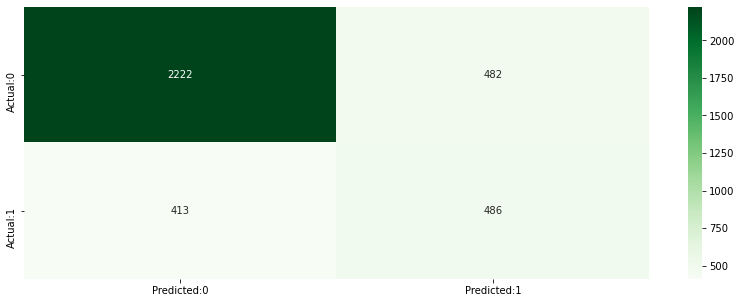

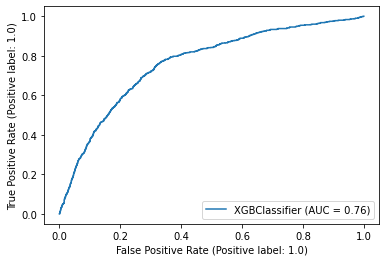

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
y_pred_xgb = clf.predict(X_test_std)


print("The Training Score of XGboost is: {}%".format(clf.score(X_train_std, y_train_smote)*100))
print("The Accuracy Score of XGboost is: {}%".format(accuracy_score(y_test, y_pred_xgb)*100))
print("The Confusion Matrix for XGboost is: \n{}\n".format(confusion_matrix(y_test, y_pred_xgb)))
print('\n')
print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test,y_pred_xgb)

plt.figure(figsize=(14,5))

conf_matrix_xgb = pd.DataFrame(data=cm_xgb,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix_xgb, annot=True,fmt='d',cmap="Greens");
print(accuracy_score(y_test,y_pred_xgb))
plot_roc_curve(clf, X_test_std, y_test)

In [56]:
TN=cm_xgb[0,0]
TP=cm_xgb[1,1]
FN=cm_xgb[1,0]
FP=cm_xgb[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [57]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =       ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy =                  ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) =       ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) =       ',TN/float(TN+FP),'\n')

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =        0.7515958923119622 
 The Missclassification = 1-Accuracy =                   0.24840410768803778 
 Sensitivity or True Positive Rate = TP/(TP+FN) =        0.5406006674082313 
 Specificity or True Negative Rate = TN/(TN+FP) =        0.8217455621301775 



## CatBoost Classifier

In [37]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import cross_val_score


# We define the model
model = CatBoostClassifier()

# We train model
model.fit(X_train_std, y_train_smote)

Learning rate set to 0.038394
0:	learn: 0.6812759	total: 210ms	remaining: 3m 30s
1:	learn: 0.6707800	total: 225ms	remaining: 1m 52s
2:	learn: 0.6601972	total: 240ms	remaining: 1m 19s
3:	learn: 0.6506066	total: 255ms	remaining: 1m 3s
4:	learn: 0.6423802	total: 267ms	remaining: 53.2s
5:	learn: 0.6360408	total: 282ms	remaining: 46.7s
6:	learn: 0.6285261	total: 297ms	remaining: 42.1s
7:	learn: 0.6221499	total: 311ms	remaining: 38.6s
8:	learn: 0.6155675	total: 326ms	remaining: 35.9s
9:	learn: 0.6099091	total: 340ms	remaining: 33.7s
10:	learn: 0.6038560	total: 355ms	remaining: 31.9s
11:	learn: 0.5985225	total: 369ms	remaining: 30.4s
12:	learn: 0.5931268	total: 384ms	remaining: 29.1s
13:	learn: 0.5887018	total: 403ms	remaining: 28.3s
14:	learn: 0.5838760	total: 421ms	remaining: 27.6s
15:	learn: 0.5798191	total: 446ms	remaining: 27.4s
16:	learn: 0.5755721	total: 464ms	remaining: 26.8s
17:	learn: 0.5717486	total: 479ms	remaining: 26.1s
18:	learn: 0.5671405	total: 492ms	remaining: 25.4s
19:	lear

161:	learn: 0.4387408	total: 2.79s	remaining: 14.4s
162:	learn: 0.4383652	total: 2.8s	remaining: 14.4s
163:	learn: 0.4381311	total: 2.82s	remaining: 14.4s
164:	learn: 0.4378679	total: 2.83s	remaining: 14.3s
165:	learn: 0.4376087	total: 2.85s	remaining: 14.3s
166:	learn: 0.4372911	total: 2.87s	remaining: 14.3s
167:	learn: 0.4371039	total: 2.88s	remaining: 14.3s
168:	learn: 0.4366542	total: 2.9s	remaining: 14.2s
169:	learn: 0.4362242	total: 2.91s	remaining: 14.2s
170:	learn: 0.4359549	total: 2.93s	remaining: 14.2s
171:	learn: 0.4357564	total: 2.94s	remaining: 14.2s
172:	learn: 0.4356141	total: 2.96s	remaining: 14.2s
173:	learn: 0.4354259	total: 2.98s	remaining: 14.2s
174:	learn: 0.4352158	total: 3s	remaining: 14.2s
175:	learn: 0.4348997	total: 3.02s	remaining: 14.2s
176:	learn: 0.4346516	total: 3.04s	remaining: 14.2s
177:	learn: 0.4344142	total: 3.06s	remaining: 14.2s
178:	learn: 0.4341600	total: 3.08s	remaining: 14.1s
179:	learn: 0.4339726	total: 3.1s	remaining: 14.1s
180:	learn: 0.4336

324:	learn: 0.4005701	total: 5.54s	remaining: 11.5s
325:	learn: 0.4003721	total: 5.56s	remaining: 11.5s
326:	learn: 0.4001211	total: 5.58s	remaining: 11.5s
327:	learn: 0.3999052	total: 5.6s	remaining: 11.5s
328:	learn: 0.3996704	total: 5.62s	remaining: 11.5s
329:	learn: 0.3995282	total: 5.63s	remaining: 11.4s
330:	learn: 0.3993836	total: 5.65s	remaining: 11.4s
331:	learn: 0.3992400	total: 5.67s	remaining: 11.4s
332:	learn: 0.3991112	total: 5.69s	remaining: 11.4s
333:	learn: 0.3989932	total: 5.71s	remaining: 11.4s
334:	learn: 0.3988195	total: 5.72s	remaining: 11.4s
335:	learn: 0.3986053	total: 5.74s	remaining: 11.3s
336:	learn: 0.3984561	total: 5.76s	remaining: 11.3s
337:	learn: 0.3983169	total: 5.78s	remaining: 11.3s
338:	learn: 0.3981440	total: 5.8s	remaining: 11.3s
339:	learn: 0.3979230	total: 5.81s	remaining: 11.3s
340:	learn: 0.3977981	total: 5.83s	remaining: 11.3s
341:	learn: 0.3976555	total: 5.84s	remaining: 11.2s
342:	learn: 0.3975212	total: 5.86s	remaining: 11.2s
343:	learn: 0.

490:	learn: 0.3711392	total: 8.3s	remaining: 8.6s
491:	learn: 0.3710324	total: 8.32s	remaining: 8.59s
492:	learn: 0.3709585	total: 8.34s	remaining: 8.58s
493:	learn: 0.3708082	total: 8.36s	remaining: 8.56s
494:	learn: 0.3706097	total: 8.37s	remaining: 8.54s
495:	learn: 0.3704000	total: 8.39s	remaining: 8.53s
496:	learn: 0.3702951	total: 8.41s	remaining: 8.51s
497:	learn: 0.3702161	total: 8.42s	remaining: 8.49s
498:	learn: 0.3700628	total: 8.44s	remaining: 8.47s
499:	learn: 0.3699560	total: 8.45s	remaining: 8.45s
500:	learn: 0.3698517	total: 8.47s	remaining: 8.44s
501:	learn: 0.3694343	total: 8.49s	remaining: 8.42s
502:	learn: 0.3692979	total: 8.51s	remaining: 8.4s
503:	learn: 0.3691761	total: 8.52s	remaining: 8.39s
504:	learn: 0.3690444	total: 8.54s	remaining: 8.37s
505:	learn: 0.3689430	total: 8.55s	remaining: 8.35s
506:	learn: 0.3688546	total: 8.56s	remaining: 8.33s
507:	learn: 0.3687769	total: 8.58s	remaining: 8.31s
508:	learn: 0.3686668	total: 8.59s	remaining: 8.29s
509:	learn: 0.3

657:	learn: 0.3525528	total: 11s	remaining: 5.74s
658:	learn: 0.3525146	total: 11.1s	remaining: 5.72s
659:	learn: 0.3524360	total: 11.1s	remaining: 5.71s
660:	learn: 0.3523621	total: 11.1s	remaining: 5.69s
661:	learn: 0.3523028	total: 11.1s	remaining: 5.67s
662:	learn: 0.3521941	total: 11.1s	remaining: 5.65s
663:	learn: 0.3520907	total: 11.1s	remaining: 5.63s
664:	learn: 0.3519958	total: 11.1s	remaining: 5.61s
665:	learn: 0.3518657	total: 11.2s	remaining: 5.6s
666:	learn: 0.3517494	total: 11.2s	remaining: 5.58s
667:	learn: 0.3516668	total: 11.2s	remaining: 5.56s
668:	learn: 0.3515669	total: 11.2s	remaining: 5.54s
669:	learn: 0.3514422	total: 11.2s	remaining: 5.53s
670:	learn: 0.3513372	total: 11.2s	remaining: 5.51s
671:	learn: 0.3512594	total: 11.3s	remaining: 5.49s
672:	learn: 0.3511473	total: 11.3s	remaining: 5.47s
673:	learn: 0.3510437	total: 11.3s	remaining: 5.46s
674:	learn: 0.3509622	total: 11.3s	remaining: 5.44s
675:	learn: 0.3507987	total: 11.3s	remaining: 5.42s
676:	learn: 0.3

819:	learn: 0.3379431	total: 13.6s	remaining: 2.98s
820:	learn: 0.3378654	total: 13.6s	remaining: 2.96s
821:	learn: 0.3377847	total: 13.6s	remaining: 2.94s
822:	learn: 0.3377467	total: 13.6s	remaining: 2.93s
823:	learn: 0.3377002	total: 13.6s	remaining: 2.91s
824:	learn: 0.3375633	total: 13.6s	remaining: 2.89s
825:	learn: 0.3374565	total: 13.7s	remaining: 2.88s
826:	learn: 0.3374053	total: 13.7s	remaining: 2.86s
827:	learn: 0.3372916	total: 13.7s	remaining: 2.84s
828:	learn: 0.3372235	total: 13.7s	remaining: 2.83s
829:	learn: 0.3371633	total: 13.7s	remaining: 2.81s
830:	learn: 0.3370343	total: 13.7s	remaining: 2.79s
831:	learn: 0.3369231	total: 13.7s	remaining: 2.77s
832:	learn: 0.3366593	total: 13.8s	remaining: 2.76s
833:	learn: 0.3365852	total: 13.8s	remaining: 2.74s
834:	learn: 0.3365213	total: 13.8s	remaining: 2.73s
835:	learn: 0.3364261	total: 13.8s	remaining: 2.71s
836:	learn: 0.3363853	total: 13.8s	remaining: 2.69s
837:	learn: 0.3363066	total: 13.8s	remaining: 2.67s
838:	learn: 

985:	learn: 0.3248027	total: 16.1s	remaining: 229ms
986:	learn: 0.3247058	total: 16.1s	remaining: 212ms
987:	learn: 0.3246148	total: 16.1s	remaining: 196ms
988:	learn: 0.3245560	total: 16.2s	remaining: 180ms
989:	learn: 0.3245133	total: 16.2s	remaining: 163ms
990:	learn: 0.3244372	total: 16.2s	remaining: 147ms
991:	learn: 0.3243634	total: 16.2s	remaining: 131ms
992:	learn: 0.3243137	total: 16.2s	remaining: 114ms
993:	learn: 0.3242302	total: 16.2s	remaining: 97.9ms
994:	learn: 0.3240762	total: 16.2s	remaining: 81.6ms
995:	learn: 0.3240240	total: 16.3s	remaining: 65.3ms
996:	learn: 0.3239927	total: 16.3s	remaining: 48.9ms
997:	learn: 0.3239216	total: 16.3s	remaining: 32.6ms
998:	learn: 0.3238678	total: 16.3s	remaining: 16.3ms
999:	learn: 0.3237913	total: 16.3s	remaining: 0us


### Applying K-fold cross-validation

In [38]:
#Applying the K-Fold Cross Validation for CatBoostClassifier
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_train_std, y = y_train_smote, cv = 5)
print("Accuracy:{:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation:{:.2f} %".format(accuracies.std()*100))


Learning rate set to 0.034905
0:	learn: 0.6806034	total: 13.8ms	remaining: 13.8s
1:	learn: 0.6682953	total: 26.8ms	remaining: 13.4s
2:	learn: 0.6568769	total: 40.1ms	remaining: 13.3s
3:	learn: 0.6458760	total: 53ms	remaining: 13.2s
4:	learn: 0.6361241	total: 66.3ms	remaining: 13.2s
5:	learn: 0.6274179	total: 79.2ms	remaining: 13.1s
6:	learn: 0.6180748	total: 91.6ms	remaining: 13s
7:	learn: 0.6099601	total: 105ms	remaining: 13s
8:	learn: 0.6038764	total: 117ms	remaining: 12.9s
9:	learn: 0.5963289	total: 130ms	remaining: 12.9s
10:	learn: 0.5897893	total: 143ms	remaining: 12.8s
11:	learn: 0.5835445	total: 156ms	remaining: 12.8s
12:	learn: 0.5775700	total: 169ms	remaining: 12.8s
13:	learn: 0.5719383	total: 186ms	remaining: 13.1s
14:	learn: 0.5668614	total: 202ms	remaining: 13.3s
15:	learn: 0.5620846	total: 216ms	remaining: 13.3s
16:	learn: 0.5565355	total: 229ms	remaining: 13.2s
17:	learn: 0.5515444	total: 241ms	remaining: 13.2s
18:	learn: 0.5470962	total: 255ms	remaining: 13.1s
19:	learn:

161:	learn: 0.3844894	total: 2.35s	remaining: 12.2s
162:	learn: 0.3841256	total: 2.37s	remaining: 12.2s
163:	learn: 0.3838873	total: 2.39s	remaining: 12.2s
164:	learn: 0.3835582	total: 2.41s	remaining: 12.2s
165:	learn: 0.3832520	total: 2.42s	remaining: 12.2s
166:	learn: 0.3829601	total: 2.44s	remaining: 12.2s
167:	learn: 0.3821127	total: 2.46s	remaining: 12.2s
168:	learn: 0.3817976	total: 2.48s	remaining: 12.2s
169:	learn: 0.3813319	total: 2.49s	remaining: 12.2s
170:	learn: 0.3810916	total: 2.51s	remaining: 12.2s
171:	learn: 0.3809163	total: 2.52s	remaining: 12.1s
172:	learn: 0.3806181	total: 2.54s	remaining: 12.2s
173:	learn: 0.3803843	total: 2.56s	remaining: 12.2s
174:	learn: 0.3801016	total: 2.58s	remaining: 12.1s
175:	learn: 0.3796960	total: 2.59s	remaining: 12.1s
176:	learn: 0.3794481	total: 2.6s	remaining: 12.1s
177:	learn: 0.3786300	total: 2.62s	remaining: 12.1s
178:	learn: 0.3783930	total: 2.63s	remaining: 12.1s
179:	learn: 0.3781672	total: 2.64s	remaining: 12s
180:	learn: 0.3

330:	learn: 0.3393626	total: 4.9s	remaining: 9.9s
331:	learn: 0.3389783	total: 4.92s	remaining: 9.89s
332:	learn: 0.3387920	total: 4.93s	remaining: 9.88s
333:	learn: 0.3385479	total: 4.95s	remaining: 9.87s
334:	learn: 0.3382113	total: 4.96s	remaining: 9.85s
335:	learn: 0.3378838	total: 4.97s	remaining: 9.83s
336:	learn: 0.3375119	total: 4.99s	remaining: 9.81s
337:	learn: 0.3370122	total: 5s	remaining: 9.79s
338:	learn: 0.3365759	total: 5.01s	remaining: 9.77s
339:	learn: 0.3363510	total: 5.03s	remaining: 9.76s
340:	learn: 0.3361233	total: 5.04s	remaining: 9.74s
341:	learn: 0.3359449	total: 5.05s	remaining: 9.72s
342:	learn: 0.3356953	total: 5.07s	remaining: 9.71s
343:	learn: 0.3354896	total: 5.08s	remaining: 9.69s
344:	learn: 0.3351608	total: 5.1s	remaining: 9.68s
345:	learn: 0.3348840	total: 5.11s	remaining: 9.66s
346:	learn: 0.3347679	total: 5.12s	remaining: 9.64s
347:	learn: 0.3343505	total: 5.14s	remaining: 9.62s
348:	learn: 0.3339976	total: 5.15s	remaining: 9.61s
349:	learn: 0.3338

494:	learn: 0.3052869	total: 7.23s	remaining: 7.38s
495:	learn: 0.3051671	total: 7.25s	remaining: 7.37s
496:	learn: 0.3045301	total: 7.27s	remaining: 7.35s
497:	learn: 0.3044174	total: 7.28s	remaining: 7.34s
498:	learn: 0.3042959	total: 7.29s	remaining: 7.32s
499:	learn: 0.3041598	total: 7.31s	remaining: 7.31s
500:	learn: 0.3040590	total: 7.32s	remaining: 7.29s
501:	learn: 0.3039543	total: 7.34s	remaining: 7.28s
502:	learn: 0.3038529	total: 7.36s	remaining: 7.27s
503:	learn: 0.3037550	total: 7.38s	remaining: 7.26s
504:	learn: 0.3034947	total: 7.39s	remaining: 7.25s
505:	learn: 0.3033709	total: 7.41s	remaining: 7.23s
506:	learn: 0.3032818	total: 7.43s	remaining: 7.22s
507:	learn: 0.3031369	total: 7.44s	remaining: 7.21s
508:	learn: 0.3030072	total: 7.46s	remaining: 7.2s
509:	learn: 0.3028465	total: 7.48s	remaining: 7.18s
510:	learn: 0.3027033	total: 7.49s	remaining: 7.17s
511:	learn: 0.3025994	total: 7.51s	remaining: 7.16s
512:	learn: 0.3023828	total: 7.52s	remaining: 7.14s
513:	learn: 0

659:	learn: 0.2818350	total: 9.59s	remaining: 4.94s
660:	learn: 0.2817612	total: 9.6s	remaining: 4.92s
661:	learn: 0.2814542	total: 9.62s	remaining: 4.91s
662:	learn: 0.2812155	total: 9.63s	remaining: 4.9s
663:	learn: 0.2809279	total: 9.65s	remaining: 4.88s
664:	learn: 0.2807177	total: 9.66s	remaining: 4.87s
665:	learn: 0.2806154	total: 9.67s	remaining: 4.85s
666:	learn: 0.2805216	total: 9.69s	remaining: 4.84s
667:	learn: 0.2804148	total: 9.7s	remaining: 4.82s
668:	learn: 0.2802146	total: 9.71s	remaining: 4.81s
669:	learn: 0.2801200	total: 9.73s	remaining: 4.79s
670:	learn: 0.2800170	total: 9.74s	remaining: 4.78s
671:	learn: 0.2799467	total: 9.76s	remaining: 4.76s
672:	learn: 0.2798953	total: 9.77s	remaining: 4.75s
673:	learn: 0.2798500	total: 9.79s	remaining: 4.73s
674:	learn: 0.2797640	total: 9.8s	remaining: 4.72s
675:	learn: 0.2795447	total: 9.81s	remaining: 4.7s
676:	learn: 0.2794868	total: 9.83s	remaining: 4.69s
677:	learn: 0.2792505	total: 9.84s	remaining: 4.67s
678:	learn: 0.279

829:	learn: 0.2637155	total: 11.9s	remaining: 2.44s
830:	learn: 0.2636410	total: 11.9s	remaining: 2.43s
831:	learn: 0.2634513	total: 11.9s	remaining: 2.41s
832:	learn: 0.2633853	total: 12s	remaining: 2.4s
833:	learn: 0.2632864	total: 12s	remaining: 2.38s
834:	learn: 0.2631015	total: 12s	remaining: 2.37s
835:	learn: 0.2627891	total: 12s	remaining: 2.35s
836:	learn: 0.2626873	total: 12s	remaining: 2.34s
837:	learn: 0.2625645	total: 12s	remaining: 2.33s
838:	learn: 0.2625002	total: 12s	remaining: 2.31s
839:	learn: 0.2623976	total: 12.1s	remaining: 2.29s
840:	learn: 0.2623329	total: 12.1s	remaining: 2.28s
841:	learn: 0.2622631	total: 12.1s	remaining: 2.27s
842:	learn: 0.2622154	total: 12.1s	remaining: 2.25s
843:	learn: 0.2620920	total: 12.1s	remaining: 2.24s
844:	learn: 0.2619324	total: 12.1s	remaining: 2.22s
845:	learn: 0.2618324	total: 12.1s	remaining: 2.21s
846:	learn: 0.2617501	total: 12.1s	remaining: 2.19s
847:	learn: 0.2616466	total: 12.2s	remaining: 2.18s
848:	learn: 0.2615460	total

991:	learn: 0.2490215	total: 14.1s	remaining: 114ms
992:	learn: 0.2489122	total: 14.1s	remaining: 99.3ms
993:	learn: 0.2488182	total: 14.1s	remaining: 85.1ms
994:	learn: 0.2487248	total: 14.1s	remaining: 70.9ms
995:	learn: 0.2486735	total: 14.1s	remaining: 56.8ms
996:	learn: 0.2485926	total: 14.1s	remaining: 42.6ms
997:	learn: 0.2485293	total: 14.2s	remaining: 28.4ms
998:	learn: 0.2484866	total: 14.2s	remaining: 14.2ms
999:	learn: 0.2484228	total: 14.2s	remaining: 0us
Learning rate set to 0.034905
0:	learn: 0.6811619	total: 14.6ms	remaining: 14.6s
1:	learn: 0.6704358	total: 28.1ms	remaining: 14s
2:	learn: 0.6605153	total: 41.9ms	remaining: 13.9s
3:	learn: 0.6517965	total: 56ms	remaining: 13.9s
4:	learn: 0.6428601	total: 69.8ms	remaining: 13.9s
5:	learn: 0.6349693	total: 84.9ms	remaining: 14.1s
6:	learn: 0.6275729	total: 99.3ms	remaining: 14.1s
7:	learn: 0.6196413	total: 114ms	remaining: 14.1s
8:	learn: 0.6132404	total: 127ms	remaining: 14s
9:	learn: 0.6067436	total: 140ms	remaining: 13

164:	learn: 0.4190606	total: 2.37s	remaining: 12s
165:	learn: 0.4187076	total: 2.39s	remaining: 12s
166:	learn: 0.4182775	total: 2.4s	remaining: 12s
167:	learn: 0.4180360	total: 2.42s	remaining: 12s
168:	learn: 0.4176013	total: 2.43s	remaining: 12s
169:	learn: 0.4173858	total: 2.44s	remaining: 11.9s
170:	learn: 0.4172067	total: 2.46s	remaining: 11.9s
171:	learn: 0.4169312	total: 2.47s	remaining: 11.9s
172:	learn: 0.4166328	total: 2.48s	remaining: 11.9s
173:	learn: 0.4163635	total: 2.5s	remaining: 11.9s
174:	learn: 0.4160378	total: 2.51s	remaining: 11.8s
175:	learn: 0.4157930	total: 2.52s	remaining: 11.8s
176:	learn: 0.4155569	total: 2.54s	remaining: 11.8s
177:	learn: 0.4153052	total: 2.55s	remaining: 11.8s
178:	learn: 0.4150736	total: 2.57s	remaining: 11.8s
179:	learn: 0.4148810	total: 2.58s	remaining: 11.8s
180:	learn: 0.4146016	total: 2.59s	remaining: 11.7s
181:	learn: 0.4144113	total: 2.61s	remaining: 11.7s
182:	learn: 0.4141599	total: 2.62s	remaining: 11.7s
183:	learn: 0.4136372	to

324:	learn: 0.3784644	total: 4.74s	remaining: 9.85s
325:	learn: 0.3783297	total: 4.76s	remaining: 9.84s
326:	learn: 0.3781355	total: 4.78s	remaining: 9.83s
327:	learn: 0.3779467	total: 4.79s	remaining: 9.81s
328:	learn: 0.3777794	total: 4.8s	remaining: 9.79s
329:	learn: 0.3775576	total: 4.81s	remaining: 9.78s
330:	learn: 0.3774233	total: 4.83s	remaining: 9.76s
331:	learn: 0.3772580	total: 4.84s	remaining: 9.74s
332:	learn: 0.3771115	total: 4.85s	remaining: 9.72s
333:	learn: 0.3769166	total: 4.87s	remaining: 9.7s
334:	learn: 0.3767694	total: 4.88s	remaining: 9.69s
335:	learn: 0.3761705	total: 4.89s	remaining: 9.67s
336:	learn: 0.3760308	total: 4.91s	remaining: 9.65s
337:	learn: 0.3757904	total: 4.92s	remaining: 9.63s
338:	learn: 0.3755332	total: 4.93s	remaining: 9.62s
339:	learn: 0.3752908	total: 4.95s	remaining: 9.6s
340:	learn: 0.3750150	total: 4.96s	remaining: 9.58s
341:	learn: 0.3748734	total: 4.97s	remaining: 9.56s
342:	learn: 0.3747269	total: 4.98s	remaining: 9.54s
343:	learn: 0.3

492:	learn: 0.3470469	total: 7.27s	remaining: 7.48s
493:	learn: 0.3468112	total: 7.29s	remaining: 7.46s
494:	learn: 0.3466804	total: 7.3s	remaining: 7.45s
495:	learn: 0.3465902	total: 7.31s	remaining: 7.43s
496:	learn: 0.3464979	total: 7.33s	remaining: 7.41s
497:	learn: 0.3463468	total: 7.34s	remaining: 7.4s
498:	learn: 0.3462227	total: 7.35s	remaining: 7.38s
499:	learn: 0.3459268	total: 7.36s	remaining: 7.36s
500:	learn: 0.3456572	total: 7.38s	remaining: 7.35s
501:	learn: 0.3454465	total: 7.39s	remaining: 7.33s
502:	learn: 0.3453191	total: 7.4s	remaining: 7.32s
503:	learn: 0.3452303	total: 7.42s	remaining: 7.3s
504:	learn: 0.3449739	total: 7.43s	remaining: 7.28s
505:	learn: 0.3448750	total: 7.44s	remaining: 7.27s
506:	learn: 0.3447795	total: 7.46s	remaining: 7.25s
507:	learn: 0.3446920	total: 7.47s	remaining: 7.23s
508:	learn: 0.3445683	total: 7.48s	remaining: 7.22s
509:	learn: 0.3444686	total: 7.5s	remaining: 7.2s
510:	learn: 0.3443591	total: 7.51s	remaining: 7.18s
511:	learn: 0.3441

659:	learn: 0.3250558	total: 9.85s	remaining: 5.07s
660:	learn: 0.3249237	total: 9.86s	remaining: 5.06s
661:	learn: 0.3248038	total: 9.87s	remaining: 5.04s
662:	learn: 0.3247079	total: 9.89s	remaining: 5.03s
663:	learn: 0.3245809	total: 9.9s	remaining: 5.01s
664:	learn: 0.3244822	total: 9.91s	remaining: 4.99s
665:	learn: 0.3244112	total: 9.93s	remaining: 4.98s
666:	learn: 0.3243504	total: 9.94s	remaining: 4.96s
667:	learn: 0.3241826	total: 9.95s	remaining: 4.95s
668:	learn: 0.3239451	total: 9.96s	remaining: 4.93s
669:	learn: 0.3238326	total: 9.98s	remaining: 4.91s
670:	learn: 0.3237668	total: 9.99s	remaining: 4.9s
671:	learn: 0.3236549	total: 10s	remaining: 4.88s
672:	learn: 0.3235194	total: 10s	remaining: 4.87s
673:	learn: 0.3233899	total: 10s	remaining: 4.85s
674:	learn: 0.3233266	total: 10s	remaining: 4.83s
675:	learn: 0.3231666	total: 10.1s	remaining: 4.82s
676:	learn: 0.3230647	total: 10.1s	remaining: 4.8s
677:	learn: 0.3229775	total: 10.1s	remaining: 4.79s
678:	learn: 0.3228879	t

828:	learn: 0.3071243	total: 12.4s	remaining: 2.56s
829:	learn: 0.3070411	total: 12.4s	remaining: 2.55s
830:	learn: 0.3069382	total: 12.5s	remaining: 2.53s
831:	learn: 0.3068759	total: 12.5s	remaining: 2.52s
832:	learn: 0.3068228	total: 12.5s	remaining: 2.5s
833:	learn: 0.3067403	total: 12.5s	remaining: 2.49s
834:	learn: 0.3066693	total: 12.5s	remaining: 2.47s
835:	learn: 0.3065767	total: 12.5s	remaining: 2.46s
836:	learn: 0.3064973	total: 12.5s	remaining: 2.44s
837:	learn: 0.3064445	total: 12.5s	remaining: 2.42s
838:	learn: 0.3063448	total: 12.6s	remaining: 2.41s
839:	learn: 0.3062455	total: 12.6s	remaining: 2.39s
840:	learn: 0.3061351	total: 12.6s	remaining: 2.38s
841:	learn: 0.3059316	total: 12.6s	remaining: 2.36s
842:	learn: 0.3058809	total: 12.6s	remaining: 2.35s
843:	learn: 0.3057695	total: 12.6s	remaining: 2.33s
844:	learn: 0.3056887	total: 12.6s	remaining: 2.32s
845:	learn: 0.3055864	total: 12.6s	remaining: 2.3s
846:	learn: 0.3053896	total: 12.7s	remaining: 2.29s
847:	learn: 0.

999:	learn: 0.2931716	total: 14.8s	remaining: 0us
Learning rate set to 0.034905
0:	learn: 0.6829692	total: 18ms	remaining: 18s
1:	learn: 0.6741559	total: 36.3ms	remaining: 18.1s
2:	learn: 0.6656016	total: 53.6ms	remaining: 17.8s
3:	learn: 0.6582455	total: 70.8ms	remaining: 17.6s
4:	learn: 0.6503613	total: 86.6ms	remaining: 17.2s
5:	learn: 0.6441334	total: 101ms	remaining: 16.7s
6:	learn: 0.6379037	total: 114ms	remaining: 16.2s
7:	learn: 0.6314050	total: 125ms	remaining: 15.5s
8:	learn: 0.6254891	total: 138ms	remaining: 15.2s
9:	learn: 0.6202075	total: 151ms	remaining: 15s
10:	learn: 0.6157262	total: 164ms	remaining: 14.8s
11:	learn: 0.6111086	total: 178ms	remaining: 14.6s
12:	learn: 0.6065659	total: 192ms	remaining: 14.6s
13:	learn: 0.6020036	total: 205ms	remaining: 14.4s
14:	learn: 0.5981367	total: 218ms	remaining: 14.3s
15:	learn: 0.5946712	total: 231ms	remaining: 14.2s
16:	learn: 0.5904159	total: 243ms	remaining: 14s
17:	learn: 0.5869045	total: 256ms	remaining: 13.9s
18:	learn: 0.58

166:	learn: 0.4651534	total: 2.38s	remaining: 11.9s
167:	learn: 0.4649051	total: 2.39s	remaining: 11.8s
168:	learn: 0.4646697	total: 2.4s	remaining: 11.8s
169:	learn: 0.4642767	total: 2.42s	remaining: 11.8s
170:	learn: 0.4640415	total: 2.43s	remaining: 11.8s
171:	learn: 0.4634772	total: 2.44s	remaining: 11.8s
172:	learn: 0.4631650	total: 2.46s	remaining: 11.7s
173:	learn: 0.4629511	total: 2.47s	remaining: 11.7s
174:	learn: 0.4627973	total: 2.49s	remaining: 11.7s
175:	learn: 0.4625968	total: 2.51s	remaining: 11.7s
176:	learn: 0.4624001	total: 2.52s	remaining: 11.7s
177:	learn: 0.4619888	total: 2.54s	remaining: 11.7s
178:	learn: 0.4616630	total: 2.56s	remaining: 11.7s
179:	learn: 0.4615018	total: 2.58s	remaining: 11.7s
180:	learn: 0.4612827	total: 2.59s	remaining: 11.7s
181:	learn: 0.4610189	total: 2.61s	remaining: 11.7s
182:	learn: 0.4606831	total: 2.63s	remaining: 11.7s
183:	learn: 0.4604947	total: 2.64s	remaining: 11.7s
184:	learn: 0.4603043	total: 2.66s	remaining: 11.7s
185:	learn: 0

325:	learn: 0.4315849	total: 4.79s	remaining: 9.9s
326:	learn: 0.4312764	total: 4.8s	remaining: 9.88s
327:	learn: 0.4309689	total: 4.82s	remaining: 9.88s
328:	learn: 0.4308066	total: 4.84s	remaining: 9.87s
329:	learn: 0.4302165	total: 4.86s	remaining: 9.86s
330:	learn: 0.4299547	total: 4.87s	remaining: 9.85s
331:	learn: 0.4295879	total: 4.89s	remaining: 9.84s
332:	learn: 0.4294208	total: 4.91s	remaining: 9.83s
333:	learn: 0.4291999	total: 4.92s	remaining: 9.81s
334:	learn: 0.4290459	total: 4.93s	remaining: 9.8s
335:	learn: 0.4288533	total: 4.95s	remaining: 9.78s
336:	learn: 0.4286548	total: 4.96s	remaining: 9.76s
337:	learn: 0.4284531	total: 4.98s	remaining: 9.75s
338:	learn: 0.4280800	total: 5s	remaining: 9.74s
339:	learn: 0.4276933	total: 5.01s	remaining: 9.73s
340:	learn: 0.4274020	total: 5.03s	remaining: 9.72s
341:	learn: 0.4271920	total: 5.05s	remaining: 9.71s
342:	learn: 0.4270084	total: 5.07s	remaining: 9.7s
343:	learn: 0.4267292	total: 5.08s	remaining: 9.69s
344:	learn: 0.42656

495:	learn: 0.4026472	total: 7.15s	remaining: 7.26s
496:	learn: 0.4025227	total: 7.16s	remaining: 7.25s
497:	learn: 0.4024461	total: 7.18s	remaining: 7.23s
498:	learn: 0.4022882	total: 7.19s	remaining: 7.22s
499:	learn: 0.4021869	total: 7.2s	remaining: 7.2s
500:	learn: 0.4020076	total: 7.21s	remaining: 7.19s
501:	learn: 0.4017022	total: 7.23s	remaining: 7.17s
502:	learn: 0.4015652	total: 7.24s	remaining: 7.15s
503:	learn: 0.4014258	total: 7.25s	remaining: 7.14s
504:	learn: 0.4013582	total: 7.27s	remaining: 7.12s
505:	learn: 0.4012640	total: 7.28s	remaining: 7.11s
506:	learn: 0.4011229	total: 7.29s	remaining: 7.09s
507:	learn: 0.4010177	total: 7.3s	remaining: 7.08s
508:	learn: 0.4009109	total: 7.32s	remaining: 7.06s
509:	learn: 0.4007578	total: 7.33s	remaining: 7.04s
510:	learn: 0.4006610	total: 7.35s	remaining: 7.03s
511:	learn: 0.4005097	total: 7.36s	remaining: 7.01s
512:	learn: 0.4002912	total: 7.37s	remaining: 7s
513:	learn: 0.4000972	total: 7.38s	remaining: 6.98s
514:	learn: 0.4000

666:	learn: 0.3818182	total: 9.52s	remaining: 4.75s
667:	learn: 0.3816406	total: 9.53s	remaining: 4.74s
668:	learn: 0.3815865	total: 9.54s	remaining: 4.72s
669:	learn: 0.3814783	total: 9.55s	remaining: 4.71s
670:	learn: 0.3813788	total: 9.57s	remaining: 4.69s
671:	learn: 0.3813007	total: 9.58s	remaining: 4.68s
672:	learn: 0.3811685	total: 9.59s	remaining: 4.66s
673:	learn: 0.3810075	total: 9.61s	remaining: 4.65s
674:	learn: 0.3807719	total: 9.62s	remaining: 4.63s
675:	learn: 0.3807104	total: 9.63s	remaining: 4.62s
676:	learn: 0.3805950	total: 9.64s	remaining: 4.6s
677:	learn: 0.3803797	total: 9.66s	remaining: 4.59s
678:	learn: 0.3803254	total: 9.67s	remaining: 4.57s
679:	learn: 0.3802536	total: 9.69s	remaining: 4.56s
680:	learn: 0.3801745	total: 9.7s	remaining: 4.54s
681:	learn: 0.3800985	total: 9.71s	remaining: 4.53s
682:	learn: 0.3800283	total: 9.72s	remaining: 4.51s
683:	learn: 0.3799498	total: 9.73s	remaining: 4.5s
684:	learn: 0.3798516	total: 9.75s	remaining: 4.48s
685:	learn: 0.3

832:	learn: 0.3656742	total: 11.7s	remaining: 2.34s
833:	learn: 0.3655881	total: 11.7s	remaining: 2.33s
834:	learn: 0.3655305	total: 11.7s	remaining: 2.31s
835:	learn: 0.3654347	total: 11.7s	remaining: 2.3s
836:	learn: 0.3653332	total: 11.7s	remaining: 2.28s
837:	learn: 0.3652320	total: 11.7s	remaining: 2.27s
838:	learn: 0.3651378	total: 11.8s	remaining: 2.25s
839:	learn: 0.3650832	total: 11.8s	remaining: 2.24s
840:	learn: 0.3650117	total: 11.8s	remaining: 2.23s
841:	learn: 0.3649340	total: 11.8s	remaining: 2.21s
842:	learn: 0.3648723	total: 11.8s	remaining: 2.2s
843:	learn: 0.3648041	total: 11.8s	remaining: 2.18s
844:	learn: 0.3647193	total: 11.8s	remaining: 2.17s
845:	learn: 0.3646373	total: 11.8s	remaining: 2.15s
846:	learn: 0.3645541	total: 11.9s	remaining: 2.14s
847:	learn: 0.3644834	total: 11.9s	remaining: 2.13s
848:	learn: 0.3643518	total: 11.9s	remaining: 2.11s
849:	learn: 0.3642951	total: 11.9s	remaining: 2.1s
850:	learn: 0.3642227	total: 11.9s	remaining: 2.08s
851:	learn: 0.3

996:	learn: 0.3526801	total: 14.2s	remaining: 42.7ms
997:	learn: 0.3526194	total: 14.2s	remaining: 28.5ms
998:	learn: 0.3525242	total: 14.2s	remaining: 14.2ms
999:	learn: 0.3524841	total: 14.2s	remaining: 0us
Learning rate set to 0.034905
0:	learn: 0.6829512	total: 13.6ms	remaining: 13.5s
1:	learn: 0.6741954	total: 26.7ms	remaining: 13.3s
2:	learn: 0.6658664	total: 39.9ms	remaining: 13.3s
3:	learn: 0.6577823	total: 53.5ms	remaining: 13.3s
4:	learn: 0.6498941	total: 68.3ms	remaining: 13.6s
5:	learn: 0.6428341	total: 81.1ms	remaining: 13.4s
6:	learn: 0.6365315	total: 94.3ms	remaining: 13.4s
7:	learn: 0.6299063	total: 106ms	remaining: 13.2s
8:	learn: 0.6240403	total: 120ms	remaining: 13.3s
9:	learn: 0.6182907	total: 137ms	remaining: 13.6s
10:	learn: 0.6137415	total: 154ms	remaining: 13.8s
11:	learn: 0.6089290	total: 171ms	remaining: 14.1s
12:	learn: 0.6046590	total: 189ms	remaining: 14.3s
13:	learn: 0.5999223	total: 210ms	remaining: 14.8s
14:	learn: 0.5959571	total: 227ms	remaining: 14.9s

167:	learn: 0.4633202	total: 2.29s	remaining: 11.3s
168:	learn: 0.4631247	total: 2.3s	remaining: 11.3s
169:	learn: 0.4628283	total: 2.31s	remaining: 11.3s
170:	learn: 0.4626332	total: 2.33s	remaining: 11.3s
171:	learn: 0.4622777	total: 2.34s	remaining: 11.3s
172:	learn: 0.4621253	total: 2.35s	remaining: 11.2s
173:	learn: 0.4619263	total: 2.36s	remaining: 11.2s
174:	learn: 0.4616942	total: 2.38s	remaining: 11.2s
175:	learn: 0.4614055	total: 2.39s	remaining: 11.2s
176:	learn: 0.4610489	total: 2.4s	remaining: 11.2s
177:	learn: 0.4608368	total: 2.42s	remaining: 11.2s
178:	learn: 0.4606392	total: 2.43s	remaining: 11.1s
179:	learn: 0.4604210	total: 2.44s	remaining: 11.1s
180:	learn: 0.4601843	total: 2.46s	remaining: 11.1s
181:	learn: 0.4598482	total: 2.47s	remaining: 11.1s
182:	learn: 0.4595376	total: 2.48s	remaining: 11.1s
183:	learn: 0.4592699	total: 2.5s	remaining: 11.1s
184:	learn: 0.4589297	total: 2.51s	remaining: 11.1s
185:	learn: 0.4587463	total: 2.53s	remaining: 11.1s
186:	learn: 0.4

340:	learn: 0.4277981	total: 4.83s	remaining: 9.34s
341:	learn: 0.4275395	total: 4.85s	remaining: 9.33s
342:	learn: 0.4274403	total: 4.86s	remaining: 9.32s
343:	learn: 0.4271111	total: 4.88s	remaining: 9.3s
344:	learn: 0.4269892	total: 4.89s	remaining: 9.29s
345:	learn: 0.4268207	total: 4.9s	remaining: 9.27s
346:	learn: 0.4266026	total: 4.92s	remaining: 9.25s
347:	learn: 0.4264540	total: 4.93s	remaining: 9.23s
348:	learn: 0.4263387	total: 4.94s	remaining: 9.22s
349:	learn: 0.4260971	total: 4.95s	remaining: 9.2s
350:	learn: 0.4257299	total: 4.97s	remaining: 9.19s
351:	learn: 0.4255830	total: 4.98s	remaining: 9.17s
352:	learn: 0.4252829	total: 4.99s	remaining: 9.15s
353:	learn: 0.4251744	total: 5.01s	remaining: 9.14s
354:	learn: 0.4249917	total: 5.03s	remaining: 9.13s
355:	learn: 0.4248682	total: 5.04s	remaining: 9.12s
356:	learn: 0.4247363	total: 5.05s	remaining: 9.1s
357:	learn: 0.4245704	total: 5.07s	remaining: 9.08s
358:	learn: 0.4241884	total: 5.08s	remaining: 9.07s
359:	learn: 0.42

502:	learn: 0.4014550	total: 7s	remaining: 6.91s
503:	learn: 0.4013757	total: 7.01s	remaining: 6.9s
504:	learn: 0.4012682	total: 7.03s	remaining: 6.89s
505:	learn: 0.4011366	total: 7.04s	remaining: 6.87s
506:	learn: 0.4010614	total: 7.05s	remaining: 6.86s
507:	learn: 0.4009665	total: 7.07s	remaining: 6.84s
508:	learn: 0.4008336	total: 7.08s	remaining: 6.83s
509:	learn: 0.4007359	total: 7.09s	remaining: 6.81s
510:	learn: 0.4005844	total: 7.1s	remaining: 6.8s
511:	learn: 0.4003195	total: 7.12s	remaining: 6.78s
512:	learn: 0.4002258	total: 7.13s	remaining: 6.77s
513:	learn: 0.3999291	total: 7.14s	remaining: 6.75s
514:	learn: 0.3995497	total: 7.16s	remaining: 6.74s
515:	learn: 0.3993943	total: 7.17s	remaining: 6.73s
516:	learn: 0.3992463	total: 7.18s	remaining: 6.71s
517:	learn: 0.3991464	total: 7.2s	remaining: 6.7s
518:	learn: 0.3990441	total: 7.21s	remaining: 6.68s
519:	learn: 0.3989636	total: 7.22s	remaining: 6.67s
520:	learn: 0.3988657	total: 7.24s	remaining: 6.65s
521:	learn: 0.398706

665:	learn: 0.3828310	total: 9.16s	remaining: 4.6s
666:	learn: 0.3826449	total: 9.18s	remaining: 4.58s
667:	learn: 0.3825938	total: 9.2s	remaining: 4.57s
668:	learn: 0.3825175	total: 9.21s	remaining: 4.56s
669:	learn: 0.3824414	total: 9.22s	remaining: 4.54s
670:	learn: 0.3823122	total: 9.23s	remaining: 4.53s
671:	learn: 0.3822346	total: 9.25s	remaining: 4.51s
672:	learn: 0.3821237	total: 9.26s	remaining: 4.5s
673:	learn: 0.3819131	total: 9.27s	remaining: 4.48s
674:	learn: 0.3818483	total: 9.28s	remaining: 4.47s
675:	learn: 0.3817455	total: 9.3s	remaining: 4.46s
676:	learn: 0.3816414	total: 9.31s	remaining: 4.44s
677:	learn: 0.3815728	total: 9.32s	remaining: 4.43s
678:	learn: 0.3813751	total: 9.34s	remaining: 4.42s
679:	learn: 0.3812601	total: 9.35s	remaining: 4.4s
680:	learn: 0.3811880	total: 9.37s	remaining: 4.39s
681:	learn: 0.3810389	total: 9.38s	remaining: 4.37s
682:	learn: 0.3809067	total: 9.39s	remaining: 4.36s
683:	learn: 0.3807331	total: 9.41s	remaining: 4.34s
684:	learn: 0.380

826:	learn: 0.3668721	total: 11.3s	remaining: 2.37s
827:	learn: 0.3667978	total: 11.3s	remaining: 2.36s
828:	learn: 0.3667387	total: 11.4s	remaining: 2.34s
829:	learn: 0.3666491	total: 11.4s	remaining: 2.33s
830:	learn: 0.3665565	total: 11.4s	remaining: 2.31s
831:	learn: 0.3665074	total: 11.4s	remaining: 2.3s
832:	learn: 0.3664442	total: 11.4s	remaining: 2.29s
833:	learn: 0.3663782	total: 11.4s	remaining: 2.27s
834:	learn: 0.3663204	total: 11.4s	remaining: 2.26s
835:	learn: 0.3662101	total: 11.4s	remaining: 2.25s
836:	learn: 0.3660645	total: 11.5s	remaining: 2.23s
837:	learn: 0.3659838	total: 11.5s	remaining: 2.22s
838:	learn: 0.3658749	total: 11.5s	remaining: 2.2s
839:	learn: 0.3657507	total: 11.5s	remaining: 2.19s
840:	learn: 0.3655630	total: 11.5s	remaining: 2.18s
841:	learn: 0.3654894	total: 11.5s	remaining: 2.16s
842:	learn: 0.3654111	total: 11.5s	remaining: 2.15s
843:	learn: 0.3653429	total: 11.6s	remaining: 2.14s
844:	learn: 0.3652241	total: 11.6s	remaining: 2.12s
845:	learn: 0.

987:	learn: 0.3533786	total: 13.5s	remaining: 164ms
988:	learn: 0.3533236	total: 13.5s	remaining: 150ms
989:	learn: 0.3532587	total: 13.5s	remaining: 137ms
990:	learn: 0.3531983	total: 13.5s	remaining: 123ms
991:	learn: 0.3530770	total: 13.5s	remaining: 109ms
992:	learn: 0.3530166	total: 13.6s	remaining: 95.6ms
993:	learn: 0.3529539	total: 13.6s	remaining: 81.9ms
994:	learn: 0.3528874	total: 13.6s	remaining: 68.3ms
995:	learn: 0.3528432	total: 13.6s	remaining: 54.6ms
996:	learn: 0.3528016	total: 13.6s	remaining: 41ms
997:	learn: 0.3527556	total: 13.6s	remaining: 27.3ms
998:	learn: 0.3526574	total: 13.6s	remaining: 13.6ms
999:	learn: 0.3526026	total: 13.6s	remaining: 0us
Learning rate set to 0.034905
0:	learn: 0.6831147	total: 13.3ms	remaining: 13.3s
1:	learn: 0.6739308	total: 25.3ms	remaining: 12.6s
2:	learn: 0.6652102	total: 38.5ms	remaining: 12.8s
3:	learn: 0.6577291	total: 51.7ms	remaining: 12.9s
4:	learn: 0.6499013	total: 65.1ms	remaining: 13s
5:	learn: 0.6431826	total: 78.2ms	rema

160:	learn: 0.4659191	total: 2.18s	remaining: 11.4s
161:	learn: 0.4657077	total: 2.19s	remaining: 11.4s
162:	learn: 0.4654520	total: 2.21s	remaining: 11.3s
163:	learn: 0.4651189	total: 2.22s	remaining: 11.3s
164:	learn: 0.4649084	total: 2.23s	remaining: 11.3s
165:	learn: 0.4646861	total: 2.25s	remaining: 11.3s
166:	learn: 0.4644386	total: 2.26s	remaining: 11.3s
167:	learn: 0.4641902	total: 2.27s	remaining: 11.3s
168:	learn: 0.4640046	total: 2.29s	remaining: 11.2s
169:	learn: 0.4637751	total: 2.3s	remaining: 11.2s
170:	learn: 0.4635472	total: 2.31s	remaining: 11.2s
171:	learn: 0.4633875	total: 2.32s	remaining: 11.2s
172:	learn: 0.4631914	total: 2.34s	remaining: 11.2s
173:	learn: 0.4630308	total: 2.35s	remaining: 11.2s
174:	learn: 0.4628404	total: 2.37s	remaining: 11.2s
175:	learn: 0.4626762	total: 2.38s	remaining: 11.2s
176:	learn: 0.4624960	total: 2.39s	remaining: 11.1s
177:	learn: 0.4620538	total: 2.41s	remaining: 11.1s
178:	learn: 0.4618519	total: 2.42s	remaining: 11.1s
179:	learn: 0

321:	learn: 0.4304680	total: 4.34s	remaining: 9.13s
322:	learn: 0.4303069	total: 4.35s	remaining: 9.13s
323:	learn: 0.4299974	total: 4.37s	remaining: 9.11s
324:	learn: 0.4297526	total: 4.38s	remaining: 9.1s
325:	learn: 0.4295928	total: 4.39s	remaining: 9.08s
326:	learn: 0.4294114	total: 4.41s	remaining: 9.07s
327:	learn: 0.4291498	total: 4.42s	remaining: 9.05s
328:	learn: 0.4289864	total: 4.43s	remaining: 9.04s
329:	learn: 0.4288474	total: 4.45s	remaining: 9.03s
330:	learn: 0.4286927	total: 4.46s	remaining: 9.01s
331:	learn: 0.4285368	total: 4.47s	remaining: 9s
332:	learn: 0.4283656	total: 4.49s	remaining: 8.98s
333:	learn: 0.4281626	total: 4.5s	remaining: 8.97s
334:	learn: 0.4279248	total: 4.51s	remaining: 8.96s
335:	learn: 0.4277732	total: 4.53s	remaining: 8.95s
336:	learn: 0.4275140	total: 4.54s	remaining: 8.94s
337:	learn: 0.4273674	total: 4.55s	remaining: 8.92s
338:	learn: 0.4272273	total: 4.57s	remaining: 8.91s
339:	learn: 0.4271101	total: 4.58s	remaining: 8.89s
340:	learn: 0.426

482:	learn: 0.4038715	total: 6.49s	remaining: 6.95s
483:	learn: 0.4037560	total: 6.51s	remaining: 6.94s
484:	learn: 0.4036472	total: 6.52s	remaining: 6.92s
485:	learn: 0.4034745	total: 6.54s	remaining: 6.91s
486:	learn: 0.4032300	total: 6.55s	remaining: 6.9s
487:	learn: 0.4031214	total: 6.56s	remaining: 6.88s
488:	learn: 0.4029989	total: 6.57s	remaining: 6.87s
489:	learn: 0.4028656	total: 6.59s	remaining: 6.86s
490:	learn: 0.4027590	total: 6.6s	remaining: 6.84s
491:	learn: 0.4026042	total: 6.61s	remaining: 6.83s
492:	learn: 0.4024399	total: 6.63s	remaining: 6.81s
493:	learn: 0.4022349	total: 6.64s	remaining: 6.8s
494:	learn: 0.4018320	total: 6.65s	remaining: 6.79s
495:	learn: 0.4017256	total: 6.66s	remaining: 6.77s
496:	learn: 0.4016236	total: 6.68s	remaining: 6.76s
497:	learn: 0.4015092	total: 6.7s	remaining: 6.75s
498:	learn: 0.4013705	total: 6.71s	remaining: 6.74s
499:	learn: 0.4012911	total: 6.72s	remaining: 6.72s
500:	learn: 0.4011906	total: 6.74s	remaining: 6.71s
501:	learn: 0.40

641:	learn: 0.3843954	total: 8.66s	remaining: 4.83s
642:	learn: 0.3843273	total: 8.68s	remaining: 4.82s
643:	learn: 0.3842458	total: 8.69s	remaining: 4.8s
644:	learn: 0.3841698	total: 8.71s	remaining: 4.79s
645:	learn: 0.3840596	total: 8.72s	remaining: 4.78s
646:	learn: 0.3839293	total: 8.73s	remaining: 4.76s
647:	learn: 0.3838490	total: 8.74s	remaining: 4.75s
648:	learn: 0.3836503	total: 8.76s	remaining: 4.74s
649:	learn: 0.3835903	total: 8.77s	remaining: 4.72s
650:	learn: 0.3834941	total: 8.78s	remaining: 4.71s
651:	learn: 0.3833982	total: 8.8s	remaining: 4.7s
652:	learn: 0.3833301	total: 8.81s	remaining: 4.68s
653:	learn: 0.3832374	total: 8.82s	remaining: 4.67s
654:	learn: 0.3831113	total: 8.84s	remaining: 4.66s
655:	learn: 0.3830106	total: 8.85s	remaining: 4.64s
656:	learn: 0.3828336	total: 8.87s	remaining: 4.63s
657:	learn: 0.3826427	total: 8.88s	remaining: 4.62s
658:	learn: 0.3825640	total: 8.89s	remaining: 4.6s
659:	learn: 0.3824481	total: 8.91s	remaining: 4.59s
660:	learn: 0.38

808:	learn: 0.3676845	total: 11.4s	remaining: 2.69s
809:	learn: 0.3676067	total: 11.4s	remaining: 2.68s
810:	learn: 0.3675321	total: 11.4s	remaining: 2.67s
811:	learn: 0.3674286	total: 11.5s	remaining: 2.65s
812:	learn: 0.3673469	total: 11.5s	remaining: 2.64s
813:	learn: 0.3672748	total: 11.5s	remaining: 2.62s
814:	learn: 0.3671658	total: 11.5s	remaining: 2.61s
815:	learn: 0.3670100	total: 11.5s	remaining: 2.6s
816:	learn: 0.3669257	total: 11.5s	remaining: 2.58s
817:	learn: 0.3668631	total: 11.5s	remaining: 2.57s
818:	learn: 0.3668200	total: 11.6s	remaining: 2.56s
819:	learn: 0.3667357	total: 11.6s	remaining: 2.54s
820:	learn: 0.3665218	total: 11.6s	remaining: 2.53s
821:	learn: 0.3664448	total: 11.6s	remaining: 2.52s
822:	learn: 0.3663472	total: 11.6s	remaining: 2.5s
823:	learn: 0.3662803	total: 11.7s	remaining: 2.49s
824:	learn: 0.3662082	total: 11.7s	remaining: 2.48s
825:	learn: 0.3660522	total: 11.7s	remaining: 2.46s
826:	learn: 0.3659238	total: 11.7s	remaining: 2.45s
827:	learn: 0.

975:	learn: 0.3539368	total: 14.3s	remaining: 352ms
976:	learn: 0.3538871	total: 14.3s	remaining: 337ms
977:	learn: 0.3538256	total: 14.3s	remaining: 322ms
978:	learn: 0.3537898	total: 14.3s	remaining: 308ms
979:	learn: 0.3536099	total: 14.4s	remaining: 293ms
980:	learn: 0.3534915	total: 14.4s	remaining: 278ms
981:	learn: 0.3534483	total: 14.4s	remaining: 264ms
982:	learn: 0.3533698	total: 14.4s	remaining: 249ms
983:	learn: 0.3532507	total: 14.4s	remaining: 234ms
984:	learn: 0.3532118	total: 14.4s	remaining: 220ms
985:	learn: 0.3531625	total: 14.4s	remaining: 205ms
986:	learn: 0.3531003	total: 14.5s	remaining: 191ms
987:	learn: 0.3530438	total: 14.5s	remaining: 176ms
988:	learn: 0.3529854	total: 14.5s	remaining: 161ms
989:	learn: 0.3529153	total: 14.5s	remaining: 147ms
990:	learn: 0.3527842	total: 14.5s	remaining: 132ms
991:	learn: 0.3527059	total: 14.5s	remaining: 117ms
992:	learn: 0.3526448	total: 14.6s	remaining: 103ms
993:	learn: 0.3526074	total: 14.6s	remaining: 88ms
994:	learn: 0

### Applying Gridsearch CV

In [39]:
from sklearn.model_selection import GridSearchCV
model_CBC = CatBoostClassifier()
    
parameters = {'depth'         : [6,8,10],
              'learning_rate' : [0.01, 0.05, 0.1],
               'iterations'    : [30, 50, 100]
                 }
grid = GridSearchCV(estimator=model_CBC, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train_std, y_train_smote)
best_param = grid.best_estimator_

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

0:	learn: 0.6571834	total: 52.5ms	remaining: 5.19s
1:	learn: 0.6273656	total: 105ms	remaining: 5.15s
2:	learn: 0.5994391	total: 156ms	remaining: 5.05s
3:	learn: 0.5780005	total: 206ms	remaining: 4.95s
4:	learn: 0.5610683	total: 261ms	remaining: 4.97s
5:	learn: 0.5472638	total: 325ms	remaining: 5.1s
6:	learn: 0.5356008	total: 388ms	remaining: 5.16s
7:	learn: 0.5257999	total: 439ms	remaining: 5.05s
8:	learn: 0.5131645	total: 498ms	remaining: 5.04s
9:	learn: 0.5056932	total: 553ms	remaining: 4.98s
10:	learn: 0.4993937	total: 605ms	remaining: 4.89s
11:	learn: 0.4929165	total: 670ms	remaining: 4.91s
12:	learn: 0.4875859	total: 733ms	remaining: 4.9s
13:	learn: 0.4827454	total: 784ms	remaining: 4.82s
14:	learn: 0.4778484	total: 836ms	remaining: 4.74s
15:	learn: 0.4734174	total: 888ms	remaining: 4.66s
16:	learn: 0.4685692	total: 944ms	remaining: 4.61s
17:	learn: 0.4656668	total: 997ms	remaining: 4.54s
18:	learn: 0.4624931	total: 1.05s	remaining: 4.47s
19:	learn: 0.4581252	total: 1.1s	remaining

### Fitting model

In [40]:
#Fit the algorithm on the data
CBC = CatBoostClassifier(depth = 10, iterations = 100, learning_rate = 0.1)
CBC.fit(X_train_std, y_train_smote)

#Predict training set:
y_pred_CBC = CBC.predict(X_test_std)

#Print model report:
print("\nModel Report Train")
#print("The Training Score of XGboost is: %.4g"% format(xgb1.score(X_train_sm, y_train_sm)*100))
print("Test Accuracy score : %.4g" % accuracy_score(y_test, y_pred_CBC))
#print("precision_score  : %.4g" % precision_score(y_test, y_pred_CBC))
#print("recall score : %.4g" % recall_score(y_test, y_pred_CBC))
#print("F1 score : %.4g" % f1_score(y_test, y_pred_CBC))
print("Auc score : %.4g" % roc_auc_score(y_test, y_pred_CBC))
print("classification report :{}".format(classification_report(y_test, y_pred_CBC)))

0:	learn: 0.6571834	total: 57.6ms	remaining: 5.7s
1:	learn: 0.6273656	total: 116ms	remaining: 5.71s
2:	learn: 0.5994391	total: 178ms	remaining: 5.76s
3:	learn: 0.5780005	total: 242ms	remaining: 5.81s
4:	learn: 0.5610683	total: 305ms	remaining: 5.8s
5:	learn: 0.5472638	total: 364ms	remaining: 5.7s
6:	learn: 0.5356008	total: 418ms	remaining: 5.55s
7:	learn: 0.5257999	total: 479ms	remaining: 5.5s
8:	learn: 0.5131645	total: 530ms	remaining: 5.35s
9:	learn: 0.5056932	total: 584ms	remaining: 5.25s
10:	learn: 0.4993937	total: 638ms	remaining: 5.16s
11:	learn: 0.4929165	total: 697ms	remaining: 5.11s
12:	learn: 0.4875859	total: 757ms	remaining: 5.06s
13:	learn: 0.4827454	total: 818ms	remaining: 5.03s
14:	learn: 0.4778484	total: 877ms	remaining: 4.97s
15:	learn: 0.4734174	total: 966ms	remaining: 5.07s
16:	learn: 0.4685692	total: 1.06s	remaining: 5.16s
17:	learn: 0.4656668	total: 1.13s	remaining: 5.15s
18:	learn: 0.4624931	total: 1.2s	remaining: 5.11s
19:	learn: 0.4581252	total: 1.25s	remaining: 

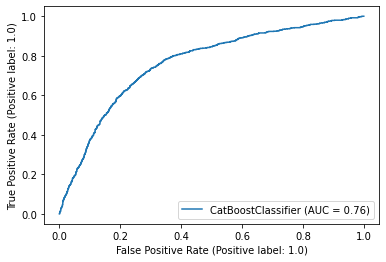

In [41]:
plot_roc_curve(CBC, X_test_std, y_test)

In [42]:
#Test (Split 15% from training data)GridSearchCV 
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_CBC)
metrics.auc(fpr, tpr)

0.6973165450105641

0.7540938107132945


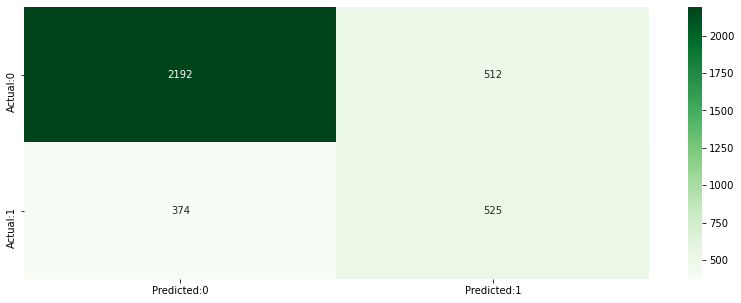

In [43]:
cm_CBC = confusion_matrix(y_test,y_pred_CBC)

plt.figure(figsize=(14,5))

conf_matrix_CBC = pd.DataFrame(data=cm_CBC,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix_CBC, annot=True,fmt='d',cmap="Greens");
print(accuracy_score(y_test,y_pred_CBC))

## Without Upsampling the data

In [44]:
X_train.shape

(14411, 30)

In [45]:
y_train.shape

(14411,)

In [46]:
X_test.shape

(3603, 30)

In [47]:
y_test.shape

(3603,)

In [48]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### XGboost

In [49]:
clf1 = XGBClassifier()

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

random_cv1=RandomizedSearchCV(estimator=clf1,param_distributions=params,
                             cv=5,n_iter=5,scoring='roc_auc',n_jobs=1,verbose=3,return_train_score=True,random_state=121)
random_cv1.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[10:55:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=0.6;, score=(train=0.823, test=0.789) total time=   0.7s
[10:55:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=5, subsample=0.6;, score=(train=0.824, test=0.789) total time=   0.7s
[10:55:35] WARNING: C:/Users/Adm

[CV 4/5] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0;, score=(train=0.819, test=0.782) total time=   0.6s
[10:55:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0;, score=(train=0.818, test=0.797) total time=   0.7s
[10:55:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [50]:
#best parameter 
random_cv1.best_params_

{'subsample': 1.0,
 'min_child_weight': 10,
 'max_depth': 5,
 'gamma': 5,
 'colsample_bytree': 0.6}

In [51]:
clf1 = XGBClassifier(colsample_bytree= 0.6,
 gamma= 5,
 max_depth= 5,
 min_child_weigh= 10,
 subsample= 1.0)

clf1.fit(X_train, y_train)

[10:56:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_child_weigh" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:56:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weigh=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1.0, tree_method='exact',
              validate_parameters=1, verbosity=None)

The Training Score of XGboost is: 79.99444868503227%
The Accuracy Score of XGboost is: 78.93422148209825%
The Confusion Matrix for XGboost is: 
[[2452  252]
 [ 507  392]]



              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      2704
         1.0       0.61      0.44      0.51       899

    accuracy                           0.79      3603
   macro avg       0.72      0.67      0.69      3603
weighted avg       0.77      0.79      0.78      3603

0.7893422148209825


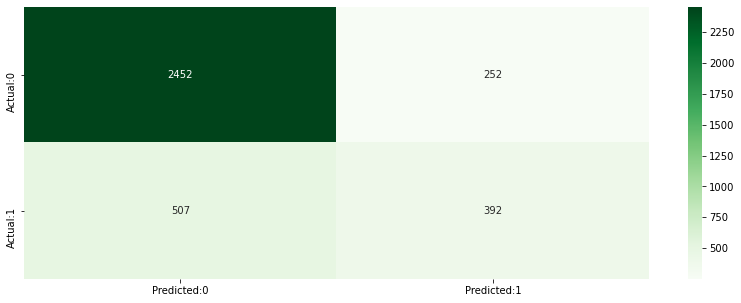

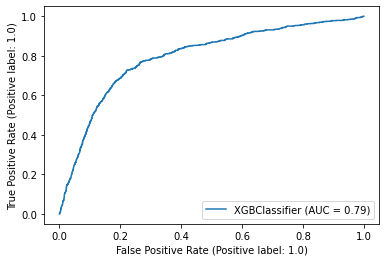

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve
y_pred_xgb1 = clf1.predict(X_test)


print("The Training Score of XGboost is: {}%".format(clf1.score(X_train, y_train)*100))
print("The Accuracy Score of XGboost is: {}%".format(accuracy_score(y_test, y_pred_xgb1)*100))
print("The Confusion Matrix for XGboost is: \n{}\n".format(confusion_matrix(y_test, y_pred_xgb1)))
print('\n')
print(classification_report(y_test, y_pred_xgb1))

cm_xgb1 = confusion_matrix(y_test,y_pred_xgb1)

plt.figure(figsize=(14,5))

conf_matrix_xgb1 = pd.DataFrame(data=cm_xgb1,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix_xgb1, annot=True,fmt='d',cmap="Greens");
print(accuracy_score(y_test,y_pred_xgb1))
plot_roc_curve(clf1, X_test, y_test)

In [58]:
TN=cm_xgb1[0,0]
TP=cm_xgb1[1,1]
FN=cm_xgb1[1,0]
FP=cm_xgb1[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [59]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =       ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy =                  ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) =       ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) =       ',TN/float(TN+FP),'\n')

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =        0.7893422148209825 
 The Missclassification = 1-Accuracy =                   0.21065778517901745 
 Sensitivity or True Positive Rate = TP/(TP+FN) =        0.4360400444938821 
 Specificity or True Negative Rate = TN/(TN+FP) =        0.9068047337278107 



- XGboost on normal data gives less miss-classification rate means it is correctly identifying candidates who will work for company
- It also have high specificity or True Negative rate means identifying those who are looking for job change
- Increased precision value when compared to other model.

In [60]:
import pickle
pickle.dump(clf1, open('job_change.pkl','wb'))